## Example Use of $\\\texttt{gw\_remnant}$ package

to compute remant properties of binary black hole mergers given waveform generated from various models

Contact : Tousif Islam [tislam@umassd.edu]  [tousifislam24@gmail.com] 

### Import gw_remnant

In [1]:
import matplotlib.pyplot as plt
import sys
path_to_gwremnant = "../"
sys.path.append(path_to_gwremnant)
import gw_remnant
from gw_remnant.gw_utils import waveform_generator
from gw_remnant.gw_remnant_calculator import GWRemnantCalculator

lal.MSUN_SI != Msun


/Users/tousifislam/miniforge3/envs/kitp-py310/lib/python3.10/site-packages/gwtools/const.py:52: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


In [2]:
# provide the path to the BHPTNRSurrogate directory
PATH_TO_BHPTNRSur = "/Users/tousifislam/Research/pool/BHPTNRSurrogate/"
sys.path.append(PATH_TO_BHPTNRSur+"/surrogates")
import BHPTNRSur1dq1e4 as bhptsur

# import surfinBH for BBH remnant property surrogate
import surfinBH
fit_name = 'NRSur3dq8Remnant'
fit = surfinBH.LoadFits(fit_name)

# import gwsurrogate for waveforms
import gwsurrogate
sur = gwsurrogate.LoadSurrogate('NRHybSur3dq8')

**** Surrogate loaded: BHPTNRSur1dq1e4 ****
Loaded NRSur3dq8Remnant fit.
Loaded NRHybSur3dq8 model


### Generate waveforms
#### NR surrogate waveforms, BHPT surrogate waveforms and remnant properties from NRSurRemnant models

In [3]:
q=8

# generate waveforms
tbhpt, hbhpt = waveform_generator.generate_bhptnrsur1dq1e4(bhptsur_module=bhptsur, mass_ratio=q)
tnr, hnr = waveform_generator.generate_nrhybsur3dq8(gwsurrogate_module=sur, 
                                                    mass_ratio=q, 
                                                    chi1=[0,0,0], chi2=[0,0,0],
                                                    times=tbhpt) # same time grid

Generating BHPTNRSur1dq1e4 waveform...
BHPTNRSur1dq1e4 time grid: [-26441.34, 99.52] M
Output time grid: [-5000.00, 49.90] M
NRHybSur3dq8 time grid: [-46747.12, 135.98] M
Output time grid: [-5000.00, 49.90] M


### Compute remant properties from waveforms

In [4]:
# calculate remnant properties
rnr = GWRemnantCalculator(time=tnr, hdict=hnr, qinput=q, spin1_input=0)
rbhpt = GWRemnantCalculator(time=tbhpt, hdict=hbhpt, qinput=q, spin1_input=0, use_filter=True)

### Print remnant properties

In [5]:
# remnant properties from BHPTNRSur1dq1e4 model
rbhpt.print_remnants()

Remnant Properties Summary
Mass ratio                    : 8.000
Initial mass                  : 1.00000000 M
Total energy radiated         : 0.01128775 M
Peak luminosity               : 0.00015471
Remnant mass                  : 0.98871225 M
Remnant spin (dimensionless)  : 0.30450190
Remnant kick velocity         : 0.00049502 c
Remnant kick velocity         : 148.40 km/s


In [6]:
# remnant properties from NRHybSur3dq8 model
rnr.print_remnants()

Remnant Properties Summary
Mass ratio                    : 8.000
Initial mass                  : 1.00000000 M
Total energy radiated         : 0.01041062 M
Peak luminosity               : 0.00012866
Remnant mass                  : 0.98958938 M
Remnant spin (dimensionless)  : 0.30795092
Remnant kick velocity         : 0.00025646 c
Remnant kick velocity         : 76.88 km/s


In [7]:
# remnant properties from NRSur3dq8Remnant model
rem = waveform_generator.compute_nrsur3dq8_remnant(fit, q, 
                                                   chi1=[0, 0, 0], 
                                                   chi2=[0, 0, 0])

Remnant predictions from surfinBH
Final mass:      0.989306 ± 0.000133 M
Final spin:      0.306742 ± 0.000039
Kick velocity:   0.000276 ± 0.000025 c


In [8]:
# peak kick velocity
rnr.peak_kick

np.float64(0.0003187508780261926)

### Plot energy and momentum profiles

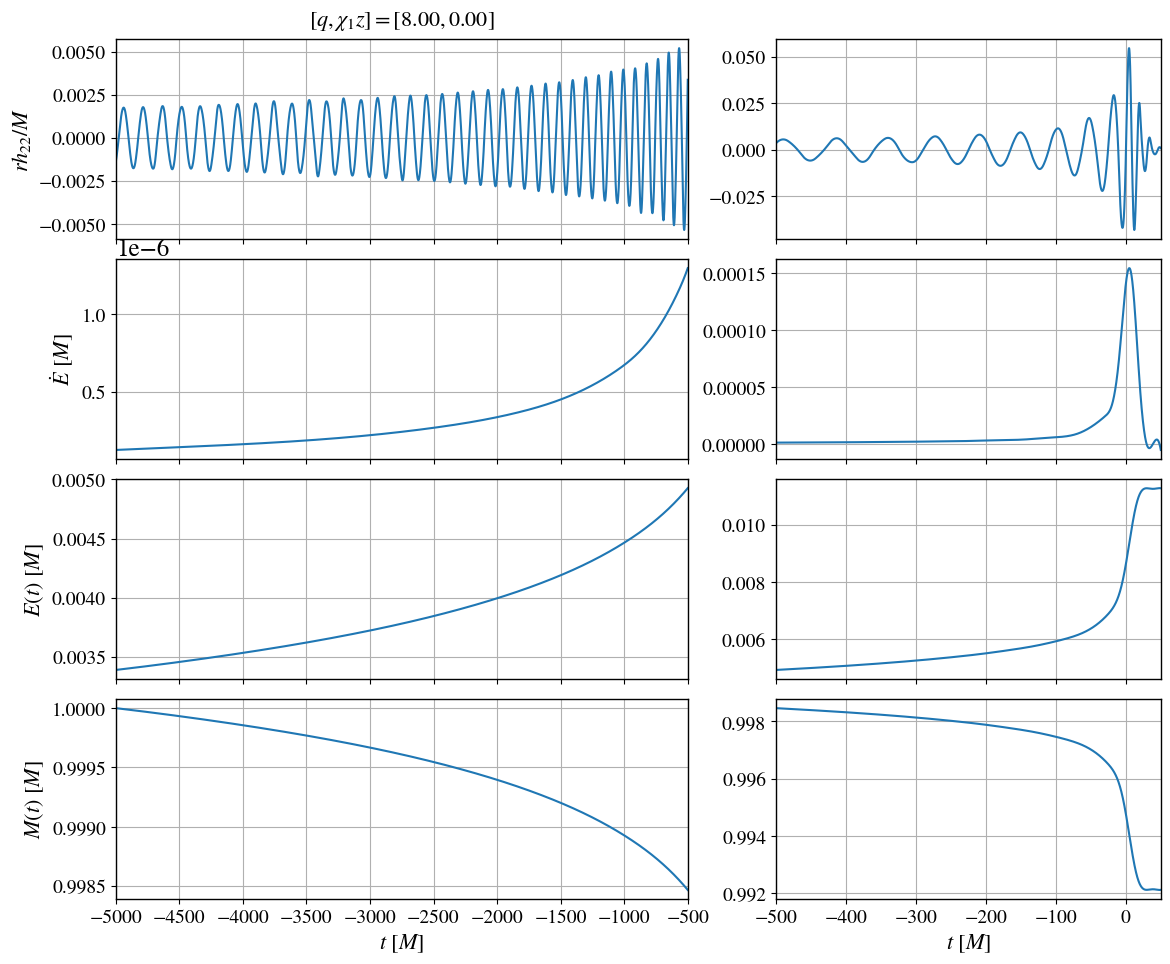

In [9]:
rbhpt.plot_mass_energy()

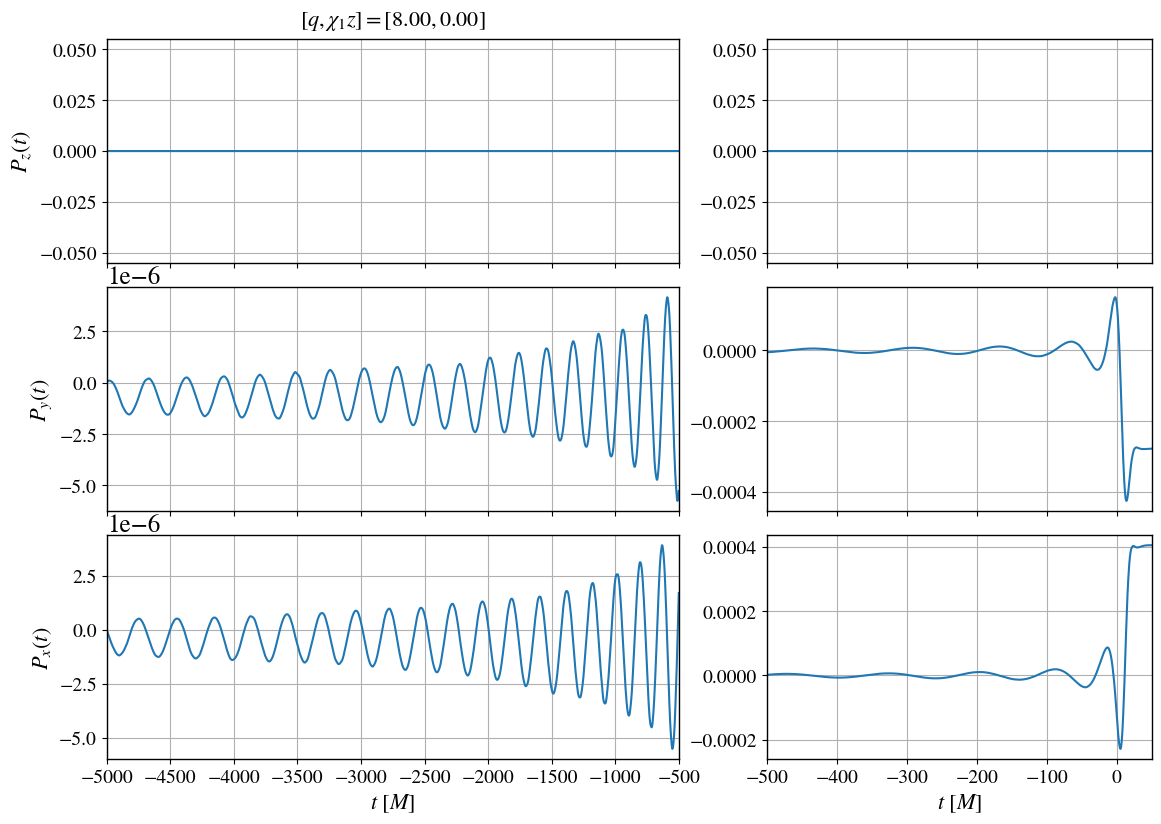

In [10]:
rbhpt.plot_linear_momentum()

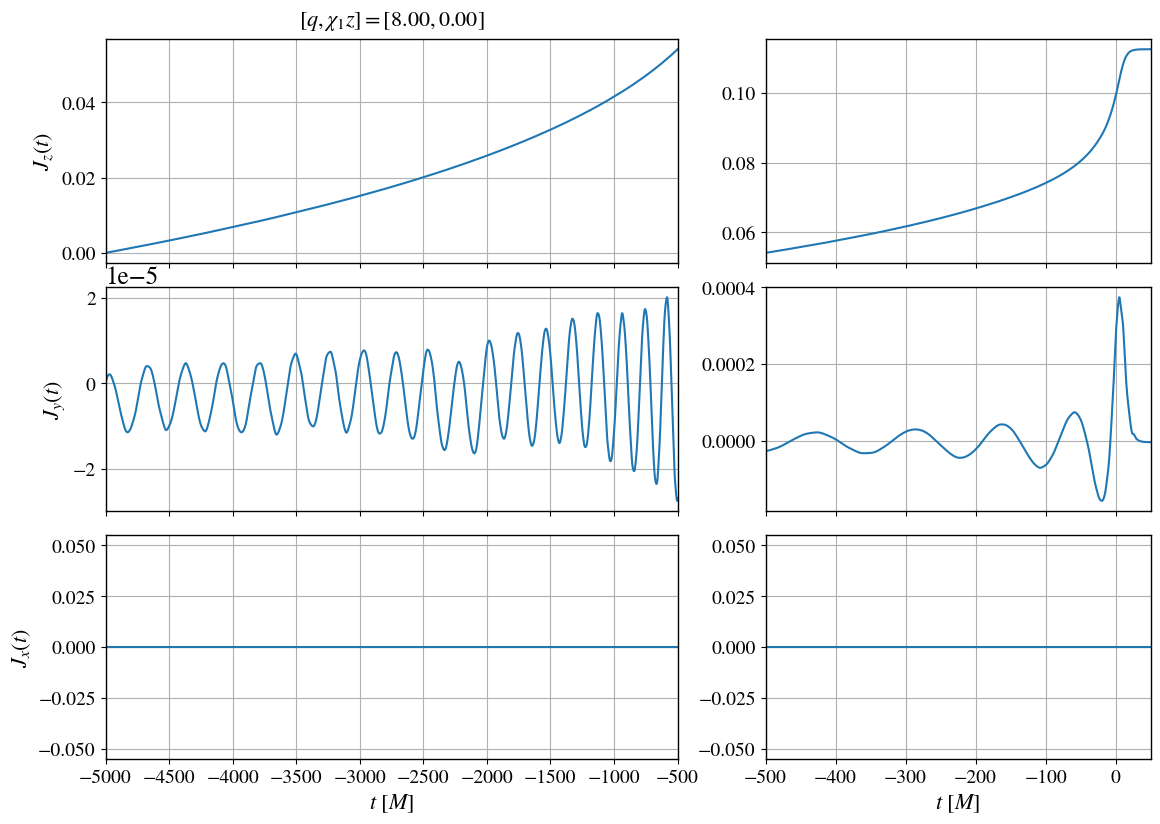

In [11]:
rbhpt.plot_angular_momentum()

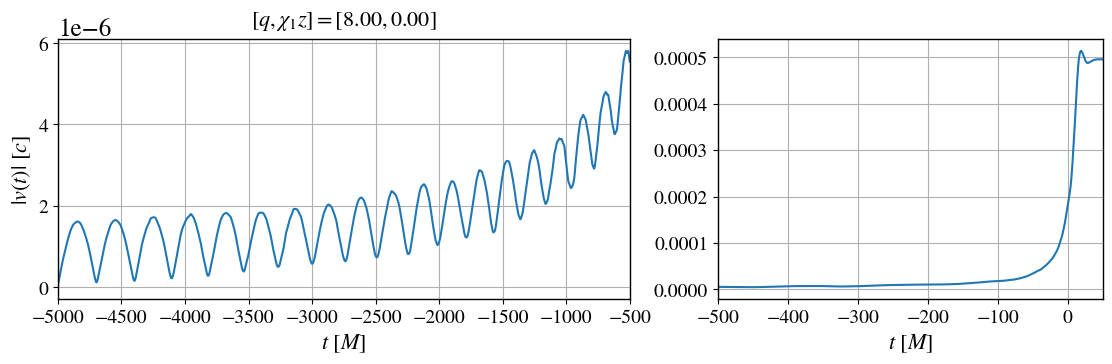

In [12]:
rbhpt.plot_kick_velocity()